In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Load Dataset

In [2]:
dataset=pd.read_csv("./heart_statlog_cleveland_hungary_final.csv")



In [3]:
dataset.shape

(1190, 12)

Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X = dataset.drop(columns=['target'])
y = dataset['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the training, validation, and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (761, 11)
Shape of X_val: (191, 11)
Shape of X_test: (238, 11)
Shape of y_train: (761,)
Shape of y_val: (191,)
Shape of y_test: (238,)


Define Model

In [5]:

from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [6]:
rf=RandomForestClassifier(criterion='entropy', max_features='sqrt')
dt= DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, splitter='random')
gb=GradientBoostingClassifier(max_depth=4, min_samples_leaf=20)
gnb=GaussianNB(var_smoothing=0.004328761281083057)
svm=SVC(C=100, gamma='auto', probability=True)
knn=KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')



lr=LogisticRegression(C=0.615848211066026, max_iter=500, penalty='l1', solver='liblinear')

<h2 style="Color:Red"> Stack 1

In [7]:


# Create a StackingClassifier with base classifiers clf1, clf2, clf3, and clf4, and meta-classifier lr
sclf1 = StackingClassifier(
    estimators=[('clf1', rf), ('clf2', dt), ('clf3', gb), ('clf4', gnb)],
    final_estimator=lr
)

In [8]:


# Fit the Stacking Classifier to the training data
sclf1.fit(X_train, y_train)

# Create a pipeline with the Stacking Classifier and the final logistic regression model
pipeline = make_pipeline(sclf1, lr)

# Use the pipeline to transform the training data into the feature space of the logistic regression model
transformed_X_train1 = pipeline[:-1].transform(X_train)

# Now you can inspect the transformed training data
# For example, you can print the first few rows
print(transformed_X_train1[:5])  # Print the first 5 rows

# Optionally, you can perform further analysis or visualization on this transformed data
# For example, you can plot histograms or scatter plots to explore the distribution of features


[[0.37       0.73076923 0.36474086 0.99430191]
 [0.07       0.02083333 0.09603444 0.25258981]
 [0.92       0.79487179 0.76929464 0.59504134]
 [0.11       0.         0.14343867 0.68226642]
 [0.33       0.80555556 0.82789716 0.66124673]]


In [9]:
transformed_X_train1.shape

(761, 4)

In [10]:
def calculate_false_negative(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fn / (fn + tp) * 100

Validation Accuracy 

Accuracy for stack 1(Validation): 
Validation Accuracy: 0.9005
Validation Precision: 0.9014
Validation Recall: 0.9005
Validation F1 Score: 0.9003


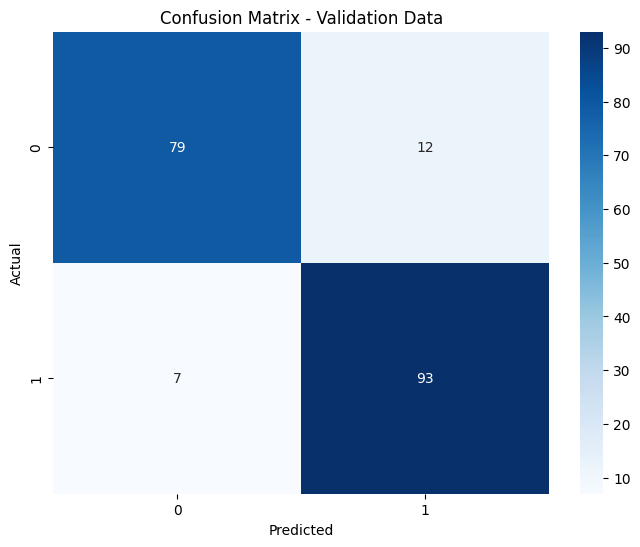

False Negative Percentage for Validation Data: 7.00%


In [11]:


# Define the function to calculate false negative percentage


# Assuming you have defined the necessary variables and models

print("Accuracy for stack 1(Validation): ")

# Make predictions on the validation set
val_predictions1 = sclf1.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions1)
print("Validation Accuracy: %0.4f" % accuracy)

# Calculate precision
precision = precision_score(y_val, val_predictions1, average='weighted')
print("Validation Precision: %0.4f" % precision)

# Calculate recall
recall = recall_score(y_val, val_predictions1, average='weighted')
print("Validation Recall: %0.4f" % recall)

# Calculate F1 score
f1 = f1_score(y_val, val_predictions1, average='weighted')
print("Validation F1 Score: %0.4f" % f1)

# Plot confusion matrix for validation data
cm = confusion_matrix(y_val, val_predictions1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix - Validation Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for validation data
false_negative_percentage = calculate_false_negative(y_val, val_predictions1)
print(f"False Negative Percentage for Validation Data: {false_negative_percentage:.2f}%")


Test Accuracy

Accuracy for stack 1(Test): 
Test Accuracy: 0.9286
Test Precision: 0.9286
Test Recall: 0.9286
Test F1 Score: 0.9285


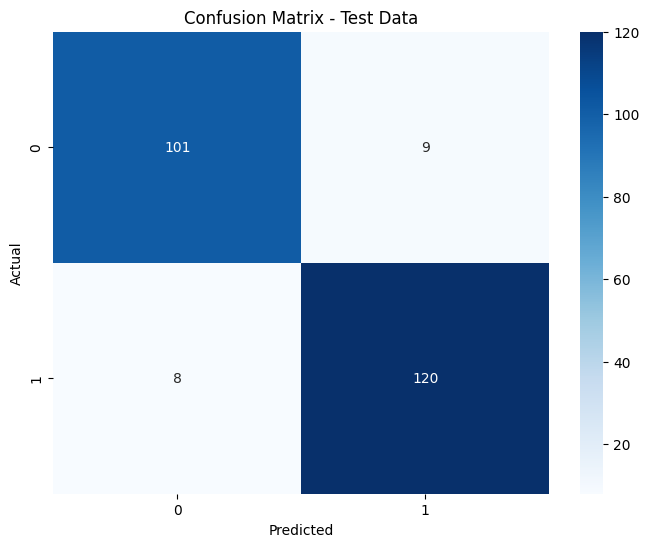

False Negative Percentage for Test Data: 6.25%


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy for stack 1(Test): ")

# Make predictions on the test set
test_predictions1 = sclf1.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions1)
print("Test Accuracy: %0.4f" % test_accuracy)

# Calculate precision
test_precision = precision_score(y_test, test_predictions1, average='weighted')
print("Test Precision: %0.4f" % test_precision)

# Calculate recall
test_recall = recall_score(y_test, test_predictions1, average='weighted')
print("Test Recall: %0.4f" % test_recall)

# Calculate F1 score
test_f1 = f1_score(y_test, test_predictions1, average='weighted')
print("Test F1 Score: %0.4f" % test_f1)

# Plot confusion matrix for test data
cm = confusion_matrix(y_test, test_predictions1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Test Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for test data
false_negative_percentage = calculate_false_negative(y_test, test_predictions1)
print(f"False Negative Percentage for Test Data: {false_negative_percentage:.2f}%")


<h2 style="Color:Red"> Stack 2

In [13]:


# Create a StackingClassifier with base classifiers clf1, clf2, clf3, and clf4, and meta-classifier lr
sclf2 = StackingClassifier(
    estimators=[('clf1', dt), ('clf2', gb), ('clf3', svm), ('clf4', knn)],
    final_estimator=lr
)

In [14]:

# Fit the Stacking Classifier to the training data
sclf2.fit(X_train, y_train)

# Create a pipeline with the Stacking Classifier and the final logistic regression model
pipeline = make_pipeline(sclf2, lr)

# Use the pipeline to transform the training data into the feature space of the logistic regression model
transformed_X_train2 = pipeline[:-1].transform(X_train)

# Now you can inspect the transformed training data
# For example, you can print the first few rows
print(transformed_X_train2[:5])  # Print the first 5 rows

# Optionally, you can perform further analysis or visualization on this transformed data
# For example, you can plot histograms or scatter plots to explore the distribution of features


[[0.5        0.36474086 0.0039962  0.        ]
 [0.06818182 0.09603444 0.00399025 0.        ]
 [0.76923077 0.76929464 0.9939156  1.        ]
 [0.5        0.14343867 0.0039918  0.        ]
 [0.9047619  0.82789716 0.00399102 0.        ]]


Accuracy for stack 2(Validation): 
Validation Accuracy: 0.9005
Validation Precision: 0.9008
Validation Recall: 0.9005
Validation F1 Score: 0.9004


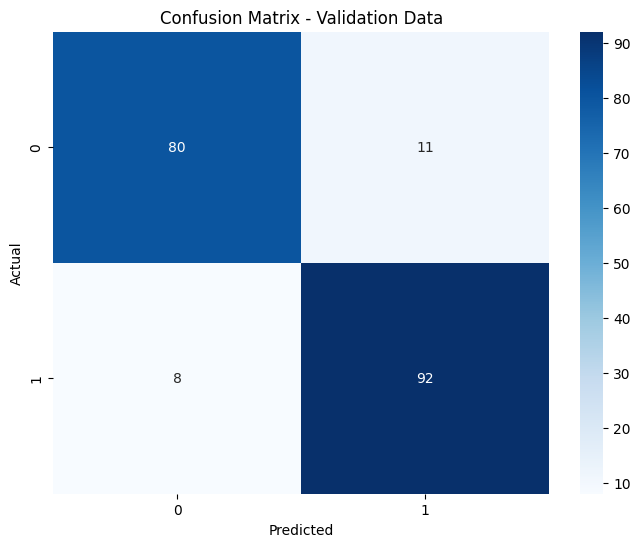

False Negative Percentage for Validation Data: 8.00%


In [15]:
print("Accuracy for stack 2(Validation): ")

# Make predictions on the validation set
val_predictions2 = sclf2.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions2)
print("Validation Accuracy: %0.4f" % accuracy)

# Calculate precision
precision = precision_score(y_val, val_predictions2, average='weighted')
print("Validation Precision: %0.4f" % precision)

# Calculate recall
recall = recall_score(y_val, val_predictions2, average='weighted')
print("Validation Recall: %0.4f" % recall)

# Calculate F1 score
f1 = f1_score(y_val, val_predictions2, average='weighted')
print("Validation F1 Score: %0.4f" % f1)

# Plot confusion matrix for validation data
cm = confusion_matrix(y_val, val_predictions2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix - Validation Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for validation data
false_negative_percentage = calculate_false_negative(y_val, val_predictions2)
print(f"False Negative Percentage for Validation Data: {false_negative_percentage:.2f}%")


Accuracy for stack 2(Test): 
Test Accuracy: 0.9370
Test Precision: 0.9370
Test Recall: 0.9370
Test F1 Score: 0.9370


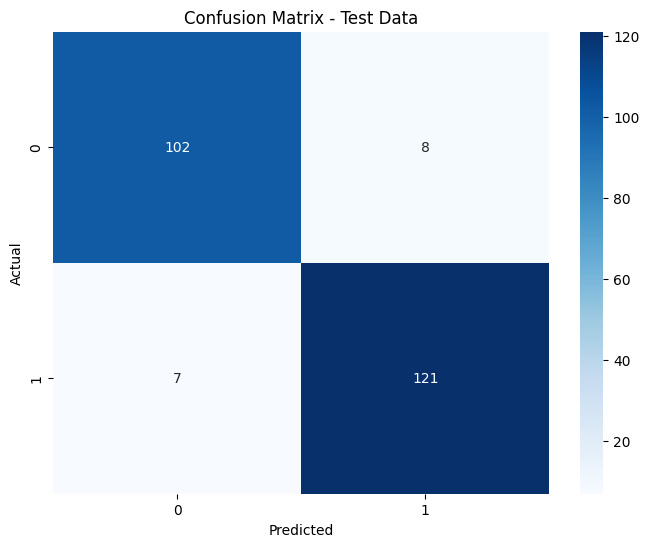

False Negative Percentage for Test Data: 5.47%


In [16]:
print("Accuracy for stack 2(Test): ")

# Make predictions on the test set
test_predictions2 = sclf2.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions2)
print("Test Accuracy: %0.4f" % test_accuracy)

# Calculate precision
test_precision = precision_score(y_test, test_predictions2, average='weighted')
print("Test Precision: %0.4f" % test_precision)

# Calculate recall
test_recall = recall_score(y_test, test_predictions2, average='weighted')
print("Test Recall: %0.4f" % test_recall)

# Calculate F1 score
test_f1 = f1_score(y_test, test_predictions2, average='weighted')
print("Test F1 Score: %0.4f" % test_f1)

# Plot confusion matrix for test data
cm = confusion_matrix(y_test, test_predictions2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Test Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for test data
false_negative_percentage = calculate_false_negative(y_test, test_predictions2)
print(f"False Negative Percentage for Test Data: {false_negative_percentage:.2f}%")


<h2 style="Color:Red"> Stack 3

In [17]:
sclf3 = StackingClassifier(
    estimators=[('clf1', rf), ('clf2', knn), ('clf3', dt), ('clf4', gb)],
    final_estimator=lr
)

In [18]:

# Fit the Stacking Classifier to the training data
sclf3.fit(X_train, y_train)

# Create a pipeline with the Stacking Classifier and the final logistic regression model
pipeline = make_pipeline(sclf3, lr)

# Use the pipeline to transform the training data into the feature space of the logistic regression model
transformed_X_train3 = pipeline[:-1].transform(X_train)

# Now you can inspect the transformed training data
# For example, you can print the first few rows
print(transformed_X_train3[:5])  # Print the first 5 rows

# Optionally, you can perform further analysis or visualization on this transformed data
# For example, you can plot histograms or scatter plots to explore the distribution of features


[[0.33       0.         0.76923077 0.36474086]
 [0.04       0.         0.31666667 0.09603444]
 [0.9        1.         0.80487805 0.76929464]
 [0.07       0.         0.14285714 0.14343867]
 [0.32       0.         0.91304348 0.82789716]]


Accuracy for stack 3(Validation): 
Validation Accuracy: 0.9058
Validation Precision: 0.9063
Validation Recall: 0.9058
Validation F1 Score: 0.9056


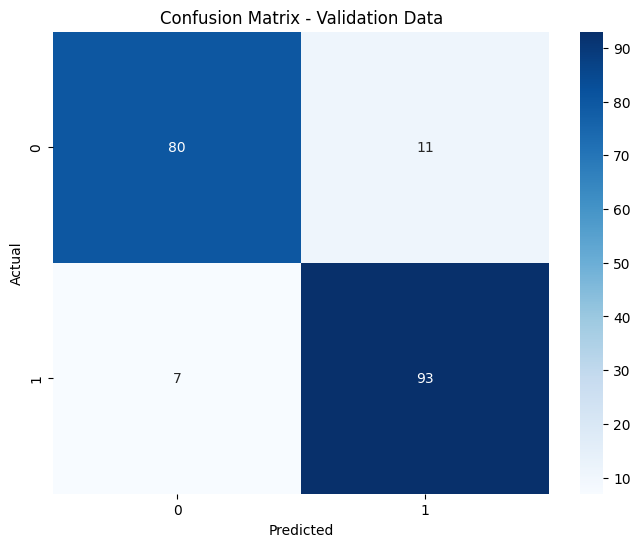

False Negative Percentage for Validation Data: 7.00%


In [19]:
print("Accuracy for stack 3(Validation): ")

# Make predictions on the validation set
val_predictions3 = sclf3.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions3)
print("Validation Accuracy: %0.4f" % accuracy)

# Calculate precision
precision = precision_score(y_val, val_predictions3, average='weighted')
print("Validation Precision: %0.4f" % precision)

# Calculate recall
recall = recall_score(y_val, val_predictions3, average='weighted')
print("Validation Recall: %0.4f" % recall)

# Calculate F1 score
f1 = f1_score(y_val, val_predictions3, average='weighted')
print("Validation F1 Score: %0.4f" % f1)

# Plot confusion matrix for validation data
cm = confusion_matrix(y_val, val_predictions3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix - Validation Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for validation data
false_negative_percentage = calculate_false_negative(y_val, val_predictions3)
print(f"False Negative Percentage for Validation Data: {false_negative_percentage:.2f}%")


Accuracy for stack 3(Test): 
Test Accuracy: 0.9412
Test Precision: 0.9412
Test Recall: 0.9412
Test F1 Score: 0.9411


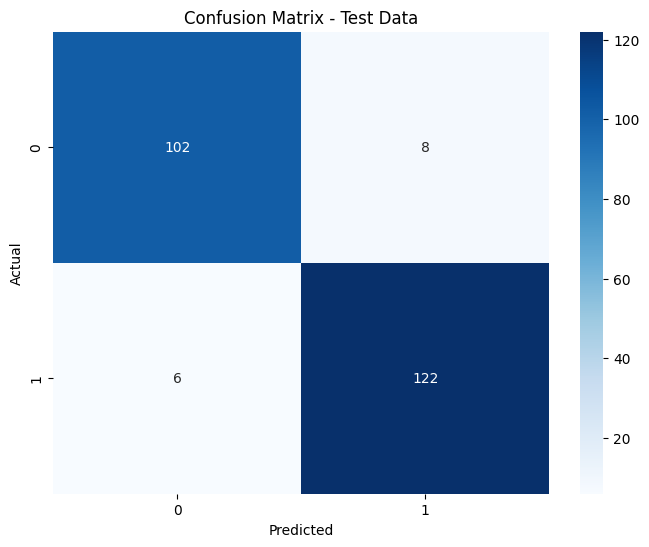

False Negative Percentage for Test Data: 4.69%


In [20]:
print("Accuracy for stack 3(Test): ")

# Make predictions on the test set
test_predictions3 = sclf3.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions3)
print("Test Accuracy: %0.4f" % test_accuracy)

# Calculate precision
test_precision = precision_score(y_test, test_predictions3, average='weighted')
print("Test Precision: %0.4f" % test_precision)

# Calculate recall
test_recall = recall_score(y_test, test_predictions3, average='weighted')
print("Test Recall: %0.4f" % test_recall)

# Calculate F1 score
test_f1 = f1_score(y_test, test_predictions3, average='weighted')
print("Test F1 Score: %0.4f" % test_f1)

# Plot confusion matrix for test data
cm = confusion_matrix(y_test, test_predictions3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Test Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for test data
false_negative_percentage = calculate_false_negative(y_test, test_predictions3)
print(f"False Negative Percentage for Test Data: {false_negative_percentage:.2f}%")


<h2 style="Color:Red"> Stack 4

In [21]:
sclf4 = StackingClassifier(
    estimators=[('clf1', dt), ('clf2', gb), ('clf3', lr), ('clf4', svm)],
    final_estimator=lr
)

In [22]:

# Fit the Stacking Classifier to the training data
sclf4.fit(X_train, y_train)

# Create a pipeline with the Stacking Classifier and the final logistic regression model
pipeline = make_pipeline(sclf4, lr)

# Use the pipeline to transform the training data into the feature space of the logistic regression model
transformed_X_train4 = pipeline[:-1].transform(X_train)

# Now you can inspect the transformed training data
# For example, you can print the first few rows
print(transformed_X_train4[:5])  # Print the first 5 rows

# Optionally, you can perform further analysis or visualization on this transformed data
# For example, you can plot histograms or scatter plots to explore the distribution of features


[[0.70588235 0.36474086 0.8345108  0.0139134 ]
 [0.15789474 0.09603444 0.07033612 0.01389737]
 [0.76923077 0.76929464 0.85523373 0.98123151]
 [0.         0.14343867 0.19418697 0.01390154]
 [0.85714286 0.82789716 0.81033653 0.01389945]]


Accuracy for stack 4(Validation): 
Validation Accuracy: 0.8953
Validation Precision: 0.8958
Validation Recall: 0.8953
Validation F1 Score: 0.8951


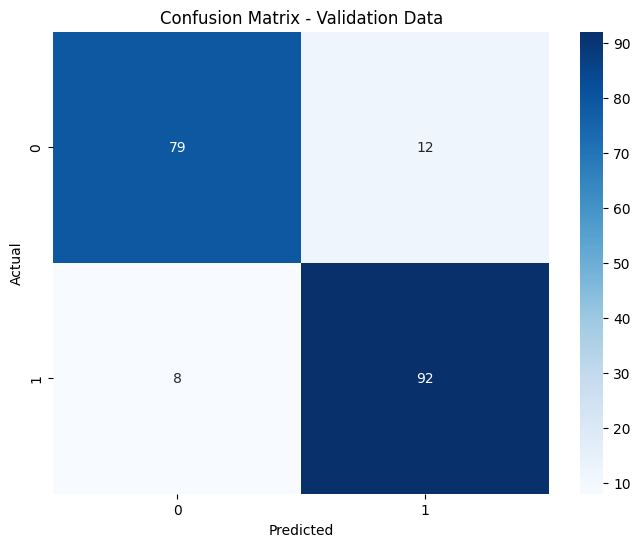

False Negative Percentage for Validation Data: 8.00%


In [23]:
print("Accuracy for stack 4(Validation): ")

# Make predictions on the validation set
val_predictions4 = sclf4.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions4)
print("Validation Accuracy: %0.4f" % accuracy)

# Calculate precision
precision = precision_score(y_val, val_predictions4, average='weighted')
print("Validation Precision: %0.4f" % precision)

# Calculate recall
recall = recall_score(y_val, val_predictions4, average='weighted')
print("Validation Recall: %0.4f" % recall)

# Calculate F1 score
f1 = f1_score(y_val, val_predictions4, average='weighted')
print("Validation F1 Score: %0.4f" % f1)

# Plot confusion matrix for validation data
cm = confusion_matrix(y_val, val_predictions4)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix - Validation Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for validation data
false_negative_percentage = calculate_false_negative(y_val, val_predictions4)
print(f"False Negative Percentage for Validation Data: {false_negative_percentage:.2f}%")


Accuracy for stack 4(Test): 
Test Accuracy: 0.9202
Test Precision: 0.9203
Test Recall: 0.9202
Test F1 Score: 0.9201


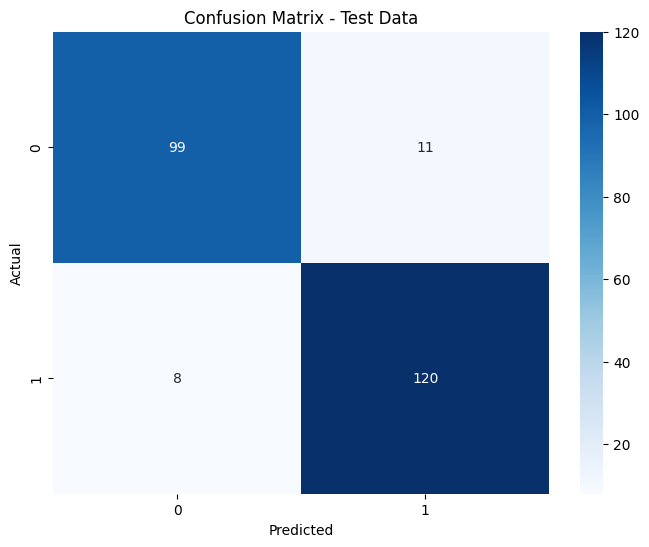

False Negative Percentage for Test Data: 6.25%


In [24]:
print("Accuracy for stack 4(Test): ")

# Make predictions on the test set
test_predictions4 = sclf4.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions4)
print("Test Accuracy: %0.4f" % test_accuracy)

# Calculate precision
test_precision = precision_score(y_test, test_predictions4, average='weighted')
print("Test Precision: %0.4f" % test_precision)

# Calculate recall
test_recall = recall_score(y_test, test_predictions4, average='weighted')
print("Test Recall: %0.4f" % test_recall)

# Calculate F1 score
test_f1 = f1_score(y_test, test_predictions4, average='weighted')
print("Test F1 Score: %0.4f" % test_f1)

# Plot confusion matrix for test data
cm = confusion_matrix(y_test, test_predictions4)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Test Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for test data
false_negative_percentage = calculate_false_negative(y_test, test_predictions4)
print(f"False Negative Percentage for Test Data: {false_negative_percentage:.2f}%")


<h1 style="Color: Violet"> Combined Majority voting

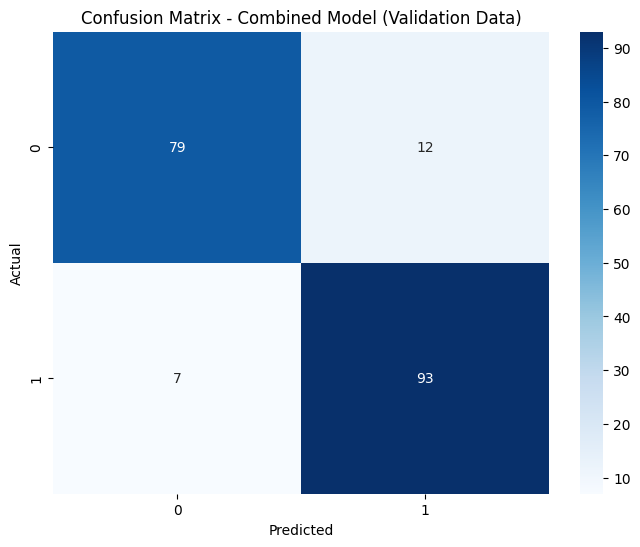

False Negative Percentage for Combined Model (Validation Data): 7.00%
Accuracy for Combined Model (Validation Data):  0.900523560209424
Precision for Combined Model (Validation Data):  0.9013845645405367
Recall for Combined Model (Validation Data):  0.900523560209424
F1 Score for Combined Model (Validation Data):  0.9003316530636243


In [25]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the function to calculate false negative percentage
def calculate_false_negative(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fn / (fn + tp) * 100

# Combine predictions using majority voting
combined_val_predictions = []
for p1, p2, p3, p4 in zip(val_predictions1, val_predictions2, val_predictions3, val_predictions4):
    votes = Counter([p1, p2, p3, p4])
    combined_val_predictions.append(votes.most_common(1)[0][0])

# Plot confusion matrix for the combined model
cm_combined = confusion_matrix(y_val, combined_val_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix - Combined Model (Validation Data)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print the false negative percentage for the combined model
false_negative_percentage_combined = calculate_false_negative(y_val, combined_val_predictions)
print(f"False Negative Percentage for Combined Model (Validation Data): {false_negative_percentage_combined:.2f}%")

# Calculate metrics for the combined model
accuracy_combined = accuracy_score(y_val, combined_val_predictions)
precision_combined = precision_score(y_val, combined_val_predictions, average='weighted')
recall_combined = recall_score(y_val, combined_val_predictions, average='weighted')
f1_combined = f1_score(y_val, combined_val_predictions, average='weighted')

# Print metrics for the combined model
print("Accuracy for Combined Model (Validation Data): ", accuracy_combined)
print("Precision for Combined Model (Validation Data): ", precision_combined)
print("Recall for Combined Model (Validation Data): ", recall_combined)
print("F1 Score for Combined Model (Validation Data): ", f1_combined)


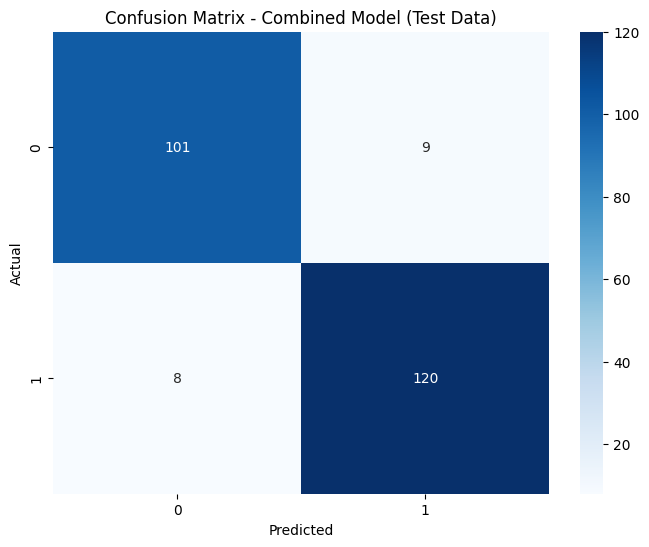

False Negative Percentage for Combined Model (Test Data): 6.25%
Accuracy for Combined Model (Test Data):  0.9285714285714286
Precision for Combined Model (Test Data):  0.9285561888506203
Recall for Combined Model (Test Data):  0.9285714285714286
F1 Score for Combined Model (Test Data):  0.9285473157334999


In [26]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the function to calculate false negative percentage
def calculate_false_negative(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fn / (fn + tp) * 100

# Combine predictions using majority voting
combined_test_predictions = []
for p1, p2, p3, p4 in zip(test_predictions1, test_predictions2, test_predictions3, test_predictions4):
    votes = Counter([p1, p2, p3, p4])
    combined_test_predictions.append(votes.most_common(1)[0][0])

# Plot confusion matrix for the combined model
cm_combined = confusion_matrix(y_test, combined_test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Combined Model (Test Data)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print the false negative percentage for the combined model
false_negative_percentage_combined = calculate_false_negative(y_test, combined_test_predictions)
print(f"False Negative Percentage for Combined Model (Test Data): {false_negative_percentage_combined:.2f}%")

# Calculate metrics for the combined model
accuracy_combined = accuracy_score(y_test, combined_test_predictions)
precision_combined = precision_score(y_test, combined_test_predictions, average='weighted')
recall_combined = recall_score(y_test, combined_test_predictions, average='weighted')
f1_combined = f1_score(y_test, combined_test_predictions, average='weighted')

# Print metrics for the combined model
print("Accuracy for Combined Model (Test Data): ", accuracy_combined)
print("Precision for Combined Model (Test Data): ", precision_combined)
print("Recall for Combined Model (Test Data): ", recall_combined)
print("F1 Score for Combined Model (Test Data): ", f1_combined)
